# Visualize HiPS Catalogs

In [1]:
%matplotlib inline

In [2]:
import vaex
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
import numpy as np

Just walk through all the files and plot the results on an Aitoff projection. Note that this will take awhile for a big catalog & CSV.

  0%|          | 0/1278 [00:00<?, ?it/s]

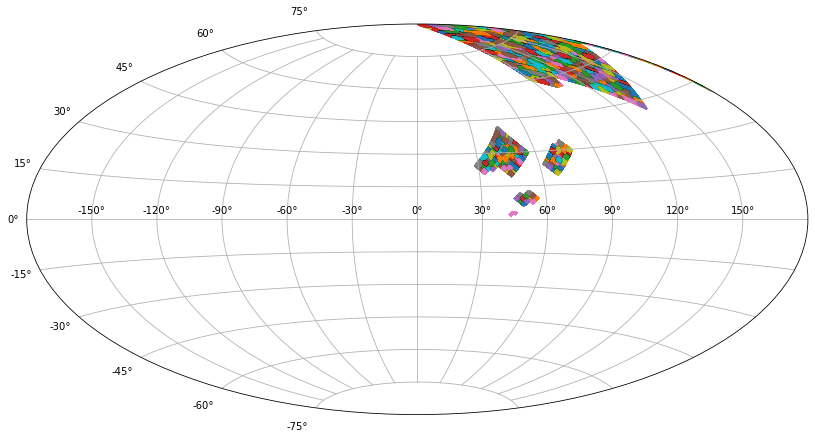

In [51]:
import os, os.path
from tqdm.notebook import tqdm

plt.figure(figsize=(14, 8))
plt.subplot(111, projection='aitoff')
plt.grid(True)

for root, dirs, files in tqdm(list(os.walk("output"))):
    if 'catalog.csv.gz' not in files:
        continue
    fn = os.path.join(root, 'catalog.csv.gz')
    df = pd.read_csv(fn)
    plt.scatter(np.deg2rad(df['ra']), np.deg2rad(df['dec']), s=0.001)


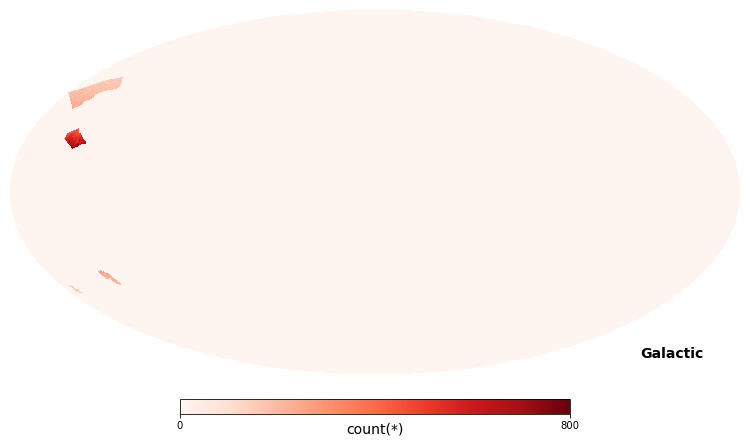

In [25]:
df.viz.healpix_heatmap(healpix_level=8, figsize=(14, 8), colormap='Reds')

ERROR:MainThread:vaex:error opening 'output/Norder5/Npix291/catalog.h5'
Traceback (most recent call last):
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/__init__.py", line 225, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/dataset.py", line 73, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/dataset.py", line 1461, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 71, in __init__
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 202, in _load
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 375, in _load_columns
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 265, in _map_hdf5_array
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/dataset_mmap.py", line 

Traceback (most recent call last):
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/IPython/core/magics/execution.py", line 1324, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 10, in <module>
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/__init__.py", line 266, in open_many
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/__init__.py", line 225, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/dataset.py", line 73, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/dataset.py", line 1461, in open
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 71, in __init__
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 202, in _load
  File "/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/vaex/hdf5/dataset.py", line 375

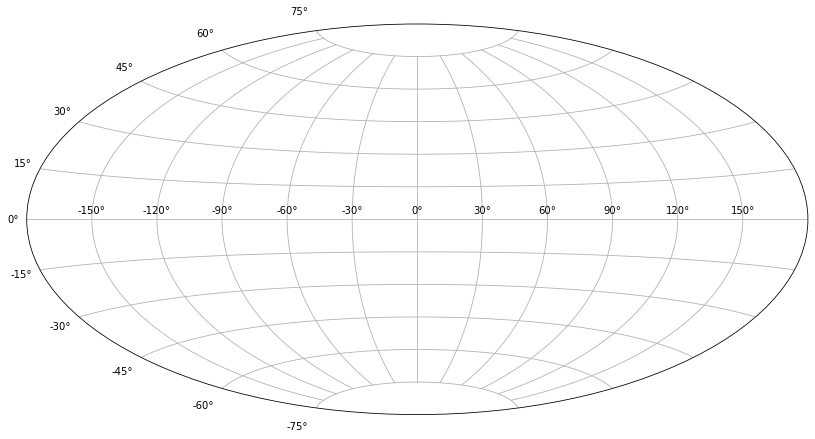

In [ ]:
%%time
import os, os.path

plt.figure(figsize=(14, 8))
plt.subplot(111, projection='aitoff')
plt.grid(True)

catfiles = [
    os.path.join(root, 'catalog.h5') for root, dirs, files in os.walk("output") if 'catalog.h5' in files
]
df = vaex.open_many(catfiles)

df.scatter(np.deg2rad(df['l']), np.deg2rad(df['b']), s=0.001, length_limit=1e10)
#plt.scatter(np.deg2rad(df['l'].values), np.deg2rad(df['b'].values), s=0.001)
plt.title("Gaia GDR2 (Galactic Coordinates)");

  0%|          | 0/2033 [00:00<?, ?it/s]

CPU times: user 2min, sys: 10.9 s, total: 2min 11s
Wall time: 2min 39s


Text(0.5, 1.0, 'Gaia GDR2 (Galactic Coordinates)')

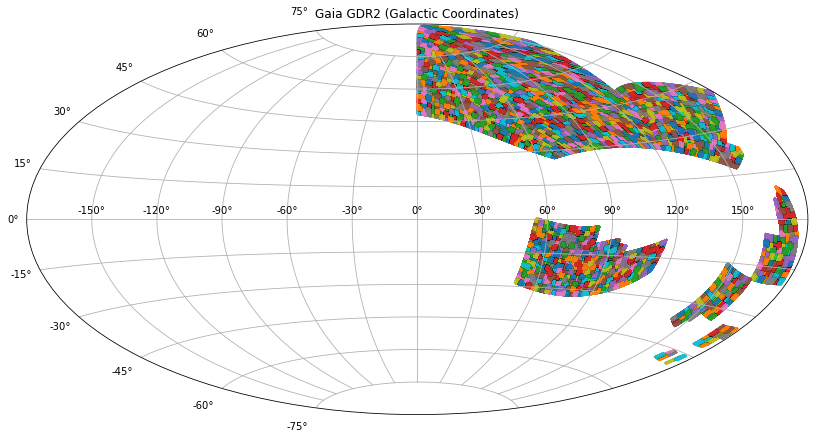

In [5]:
%%time
import os, os.path
from tqdm.notebook import tqdm

plt.figure(figsize=(14, 8))
plt.subplot(111, projection='aitoff')
plt.grid(True)

for root, dirs, files in tqdm(list(os.walk("output"))):
    if 'catalog.h5' not in files:
        continue
    fn = os.path.join(root, 'catalog.h5')
    df = vaex.open(fn)
    plt.scatter(np.deg2rad(df['l'].values), np.deg2rad(df['b'].values), s=0.001)

plt.title("Gaia GDR2 (Galactic Coordinates)");

  0%|          | 0/2033 [00:00<?, ?it/s]

CPU times: user 5min 6s, sys: 1min 6s, total: 6min 13s
Wall time: 6min 54s


Text(0.5, 1.0, 'Gaia GDR2 (Galactic Coordinates)')

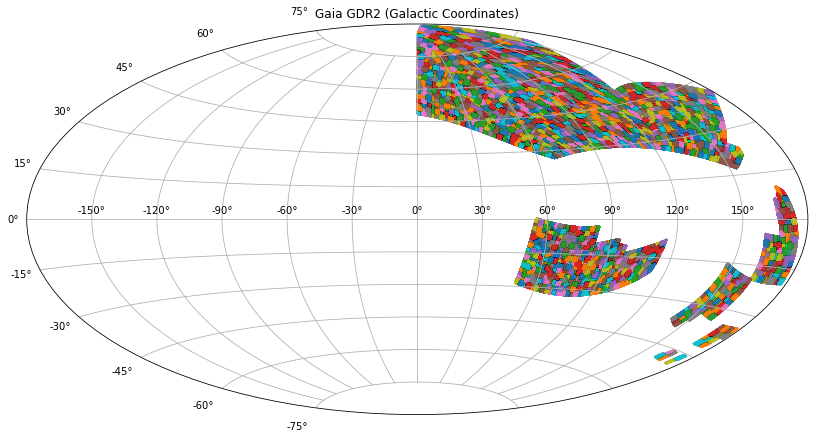

In [66]:
%%time
import os, os.path
from tqdm.notebook import tqdm

plt.figure(figsize=(14, 8))
plt.subplot(111, projection='aitoff')
plt.grid(True)

for root, dirs, files in tqdm(list(os.walk("output"))):
    if 'catalog.h5' not in files:
        continue
    fn = os.path.join(root, 'catalog.h5')
    df = pd.read_hdf(fn)
    plt.scatter(np.deg2rad(df['l']), np.deg2rad(df['b']), s=0.001)

plt.title("Gaia GDR2 (Galactic Coordinates)");

In [4]:
from dask.distributed import Client, progress
client = Client(n_workers=4, threads_per_worker=2, memory_limit='16GB')
client.cluster

In [2]:
import dask
import dask.dataframe as dd
import numpy as np

In [255]:
pdf = pd.DataFrame(dict(key=np.arange(100, dtype=int), value=np.arange(100)/10))

np.random.seed(42)
import glob

! rm data/foo-*.csv data/bar-*.csv
divs = []
for i, d in enumerate(np.array_split(pdf, 4)):
    divs.append(d["key"].iloc[0])

    # keep a random subset
    keep = np.random.choice(d.index.values, size=len(d.index.values)//2, replace=False)
    d = d.loc[keep]

    d.to_csv(f'data/foo-{i:02}.csv', index=False)
divs.append(pdf["key"].iloc[-1])

divs2 = []
for i, d in enumerate(np.array_split(pdf, 8)):
    divs2.append(d["key"].iloc[0])

    # keep a random subset
    keep = np.random.choice(d.index.values, size=len(d.index.values)//2, replace=False)
    d = d.loc[keep]
    
    d.to_csv(f'data/bar-{i:02}.csv', index=False)
divs2.append(pdf["key"].iloc[-1])

# re-read the generated CSVs
pdf = pd.concat(pd.read_csv(fn).set_index('key') for fn in glob.glob('data/foo-*.csv'))
pdf2 = pd.concat(pd.read_csv(fn).set_index('key') for fn in glob.glob('data/bar-*.csv'))

df = dd.read_csv('data/foo-*.csv').set_index('key', sorted=True, divisions=divs)
df2 = dd.read_csv('data/bar-*.csv').set_index('key', sorted=True, divisions=divs2)
divs, divs2

([0, 25, 50, 75, 99], [0, 13, 26, 39, 52, 64, 76, 88, 99])

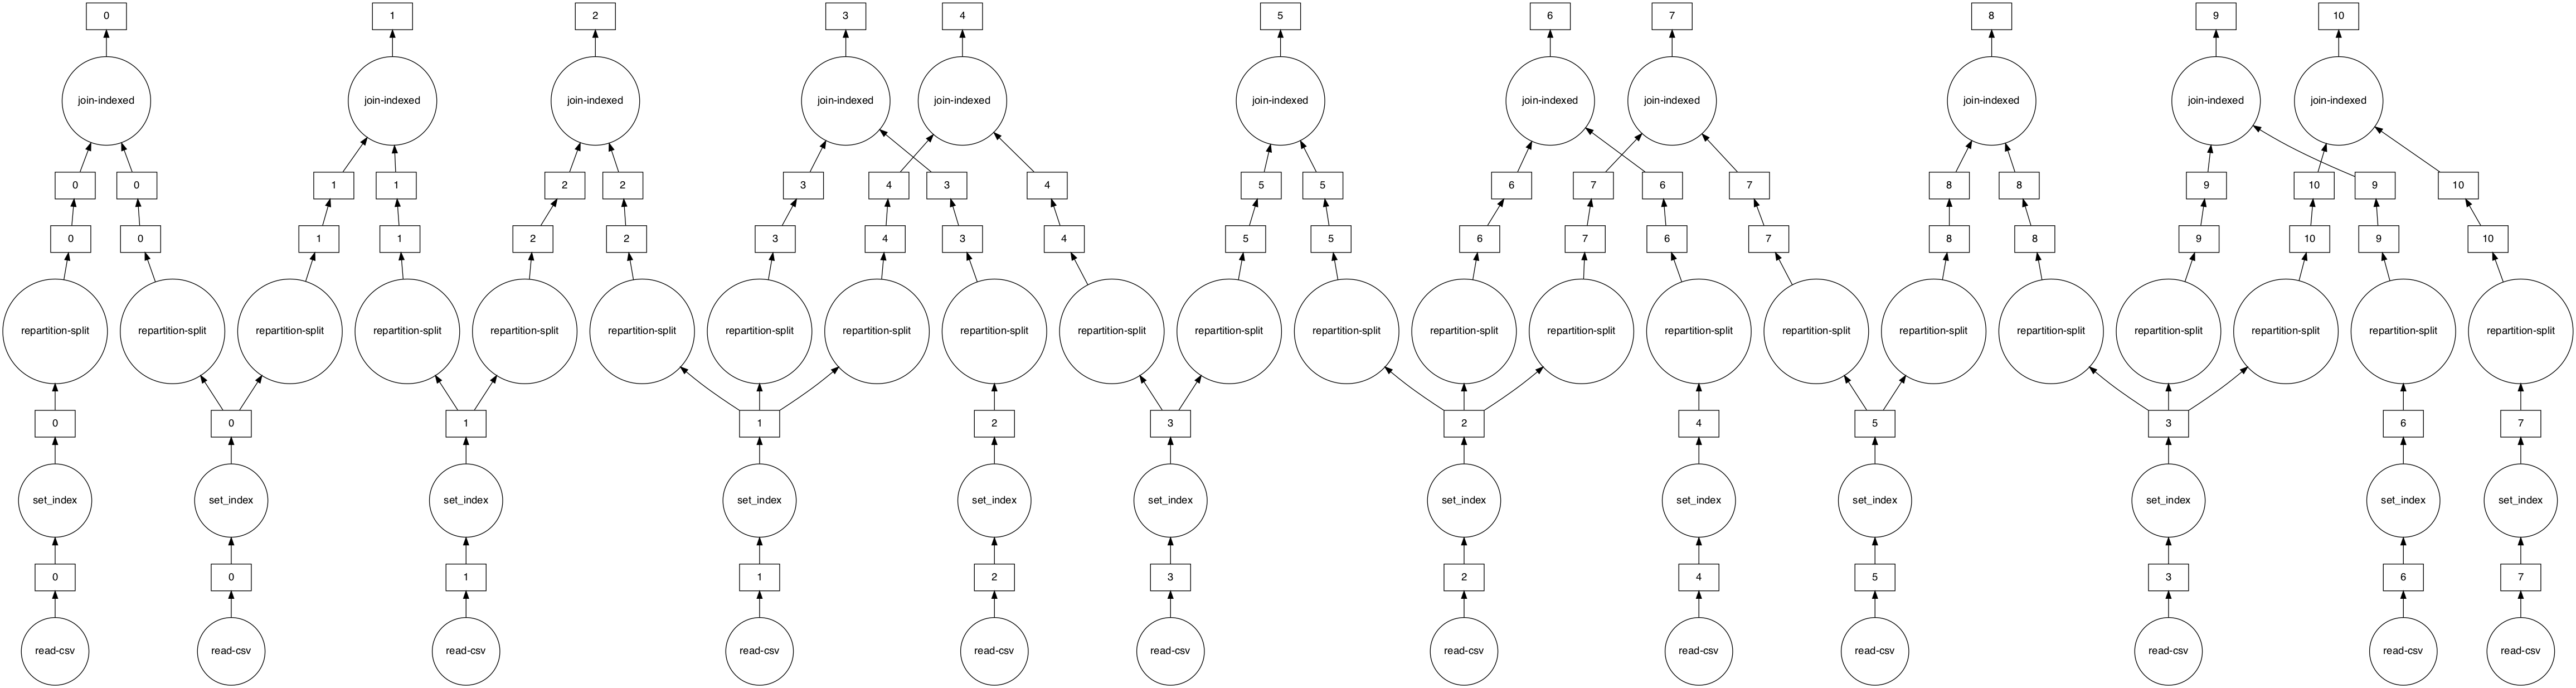

In [267]:
df.merge(df2, left_index=True, right_index=True, how='outer').visualize(optimize_graph=False)

In [254]:
pres = pdf.merge(pdf2, left_index=True, right_index=True, how='outer') # pandas version
res   = df.merge( df2, left_index=True, right_index=True, how='outer').compute() # dask version
assert pres.equals(res) # verify equality
res

,value_x,value_y
key,,
0,0.0,NaN
1,NaN,0.1
2,NaN,0.2
3,NaN,0.3
4,0.4,0.4
...,...,...
93,NaN,9.3
94,NaN,9.4
95,9.5,NaN


In [266]:
futures = client.compute( df.merge( df2, left_index=True, right_index=True, how='outer'), optimize_graph=True )
progress(futures)

VBox()

## Dask Scalability Tests

In [17]:
# rewrite to pandas HDF5 format
import vaex
import dask
import os, os.path
import glob
from tqdm.notebook import tqdm
import pandas as pd
src = glob.glob('output/*/*/catalog.h5')
dest = [ os.path.join(os.path.dirname(fn), 'catalog.parquet') for fn in src ]

@dask.delayed
def convert(fn, destFn):
    df = vaex.open(fn).to_pandas_df()
    df.set_index('hips_pix').sort_index()
    df.to_parquet(destFn)
    return destFn

output = []
for fn, destFn in list(zip(src, dest)):
    fut = convert(fn, destFn)
    output.append(fut)

results = client.compute(output)
progress(*results)

VBox()

Now test how long it takes to read a large number of files...

In [1]:
%%time
import glob
pqfiles = glob.glob('output/*/*/catalog.parquet')

CPU times: user 193 ms, sys: 710 ms, total: 903 ms
Wall time: 2.41 s


In [27]:
%%time
import dask.dataframe as dd
gaia = dd.read_parquet(pqfiles, columns=['l', 'b'], index='hips_pix')
#df = dd.read_parquet('output/Norder5/Npix4522/catalog.parquet')

CPU times: user 1.26 s, sys: 680 ms, total: 1.94 s
Wall time: 1.9 s


In [5]:
def part_size(df):
    return len(df)

res = gaia.map_partitions(part_size)
futures = client.compute(res)
progress(futures)

/Users/mjuric/miniconda3/envs/lsd2/lib/python3.9/site-packages/distributed/worker.py:4156: UserWarning: Large object of size 1.30 MiB detected in task graph: 
  (["('part_size-cc1024024ff2ba5b80f1965c8e780af2',  ... f2', 24503)"],)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  warnings.warn(


VBox()

(0.0, 100000.0)

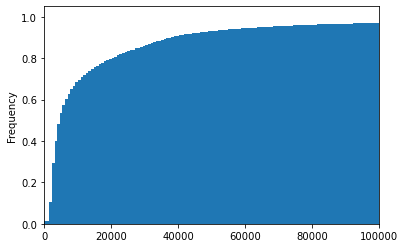

In [6]:
import matplotlib.pyplot as plt
res = futures.result()
res.plot.hist(bins=1000, cumulative=True, density=True)
plt.xlim(0, 1_000_00)

In [28]:
import numpy as np
gaia['_x'] = (gaia['l'] / 0.5).astype(int)
gaia['_y'] = ((gaia['b'] + 90) / 0.5).astype(int)
res = gaia.groupby(['_x', '_y'])['l'].count()
res

Dask Series Structure:
npartitions=1
    int64
      ...
Name: l, dtype: int64
Dask Name: series-groupby-count-agg, 273045 tasks

In [29]:
#df.count().compute()
#res = df.count()
futures = client.compute(res)
progress(futures)

VBox()

In [30]:
res = futures.result()
res

_x   _y 
245  234      1453
246  234      1279
     235      1470
247  233       138
     234      1489
             ...  
585  221      4667
700  161       330
     162     15092
701  161      5632
     162    102068
Name: l, Length: 146436, dtype: int64

In [32]:
img = np.zeros(shape=(180*4, 90*4))
df = res.reset_index()
img[df['_x'], df['_y']] = np.log10(df['l'])

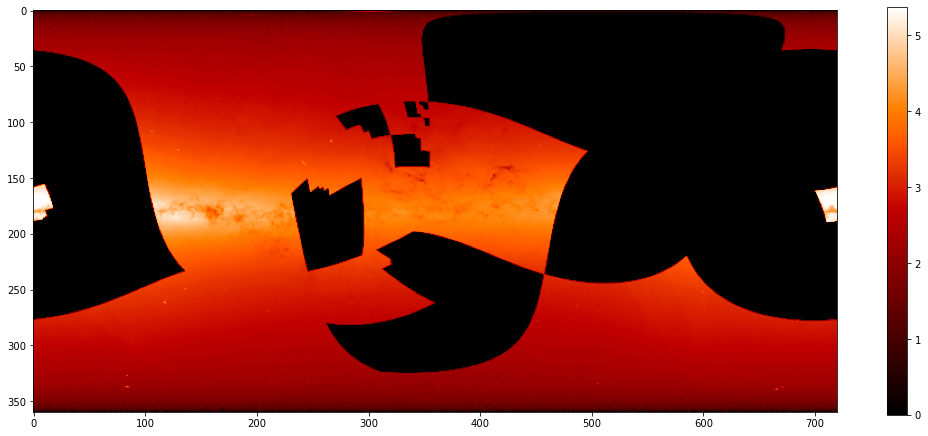

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,7.5))
plt.imshow(img.T, cmap='gist_heat')
plt.colorbar()

## API

In [ ]:
gaia = df.from_hips("s3://dirac/gaia")
sdss = df.from_hips("s3://dirac/sdss")

df = sdss.crossmatch(gaia, radius=1*u.as).select_circle(skypoint, radius=2u)
df.compute()

## More tests

In [98]:
pdf = pd.DataFrame(dict(key=np.arange(100, dtype=int), value=np.arange(100)/10))
df = dd.from_pandas(pdf, npartitions=5).set_index('key', sorted=True)

pdf2 = pd.DataFrame(dict(key=np.arange(100, dtype=int), value=np.arange(100)/10))
df2 = dd.from_pandas(pdf2, npartitions=5).set_index('key', sorted=True)

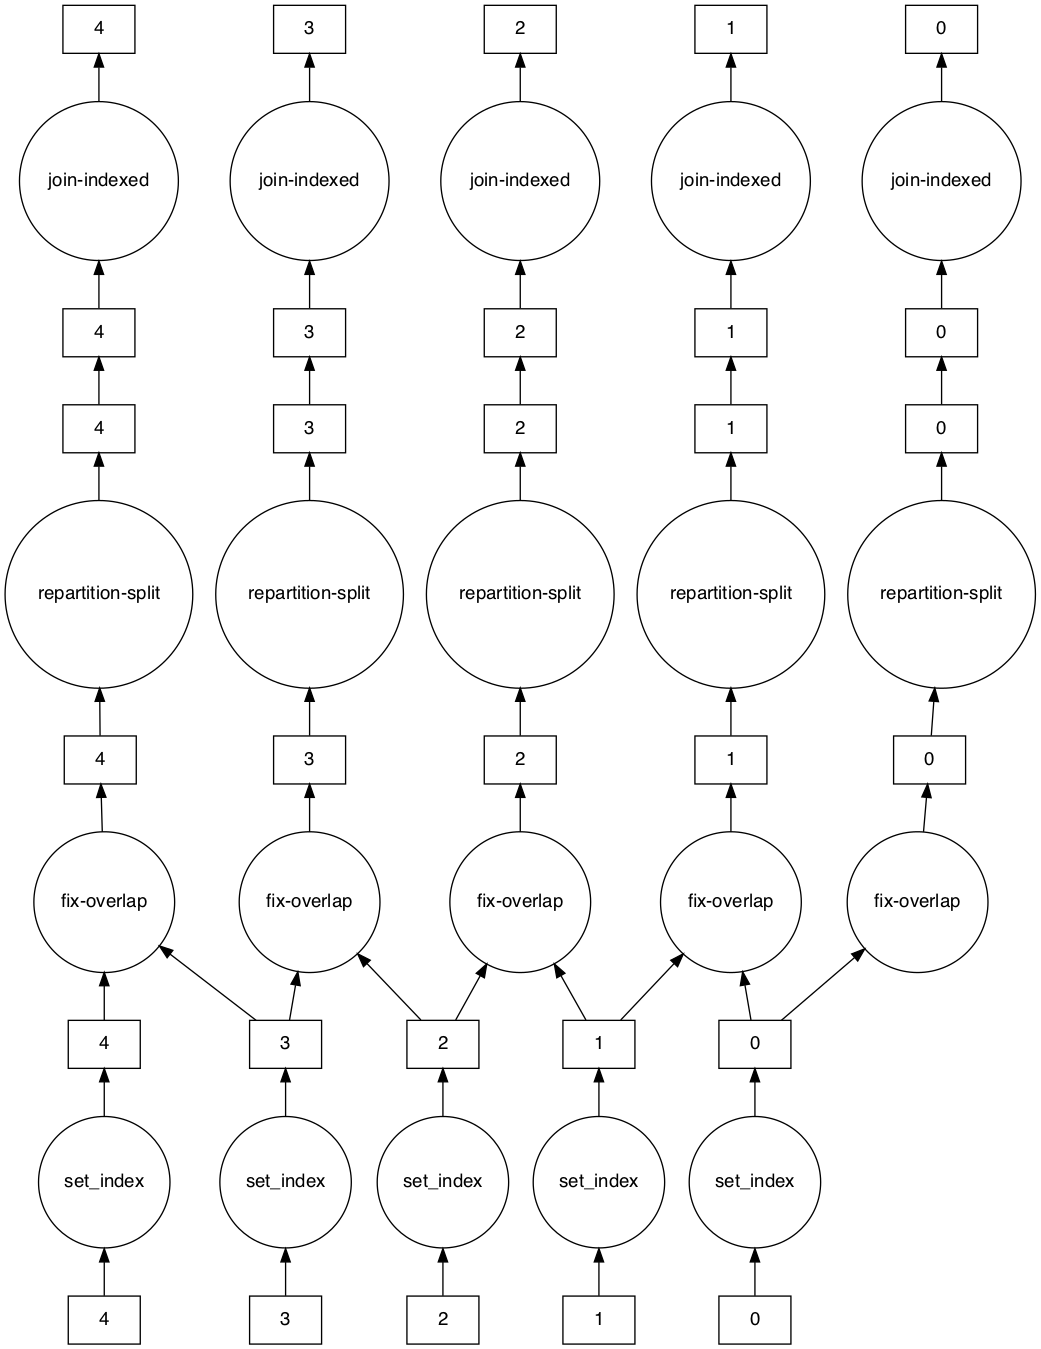

In [99]:
df.merge(df2, left_index=True, right_index=True).visualize()

In [4]:
import vaex
import pandas as pd
ff = ['output//Norder5/Npix652/catalog.h5', 'output//Norder5/Npix2201/catalog.h5', 'output//Norder5/Npix3920/catalog.h5']
ff2 = []
for fn in ff:
    df = vaex.open(fn)
    df = df.to_pandas_df()
    destFn='-'.join(fn.split('/')[-2:])
    print(fn, destFn)
    ff2.append(destFn)
    df = df.set_index('hips_pix').sort_index()
    df.to_hdf(destFn, key='catalog', format='table', complib='blosc:lz4', complevel=9)

output//Norder5/Npix652/catalog.h5 Npix652-catalog.h5
output//Norder5/Npix2201/catalog.h5 Npix2201-catalog.h5
output//Norder5/Npix3920/catalog.h5 Npix3920-catalog.h5


In [5]:
df = dd.read_hdf(ff2, key='catalog', sorted_index=True)
df

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,hips_k
npartitions=3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
652,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,int64,int64,float64,int64,int64,bool,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
2201,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
! cp *.h5 cat2/
cat2ff = [ f'cat2/{fn}' for fn in ff2 ]
df2 = dd.read_hdf(ff2, key='catalog', sorted_index=True)
df2

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,hips_k
npartitions=3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
652,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,int64,int64,float64,int64,int64,bool,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
2201,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


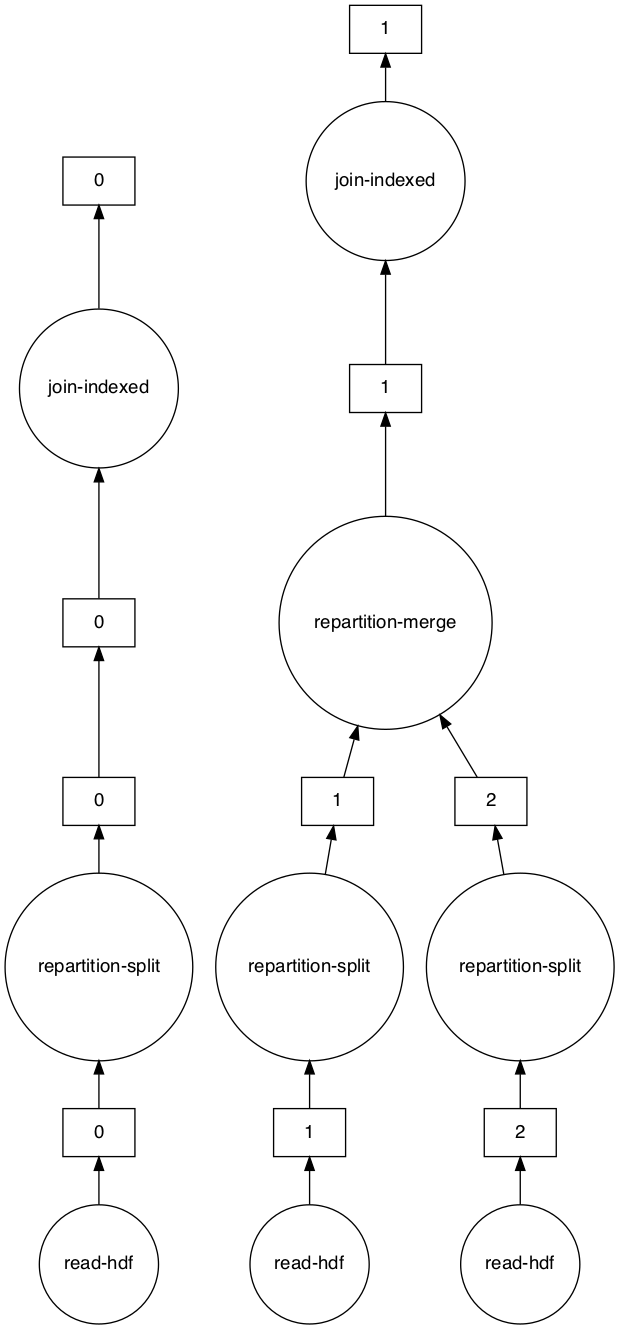

In [8]:
df.merge(df2, left_index=True, right_index=True).visualize()

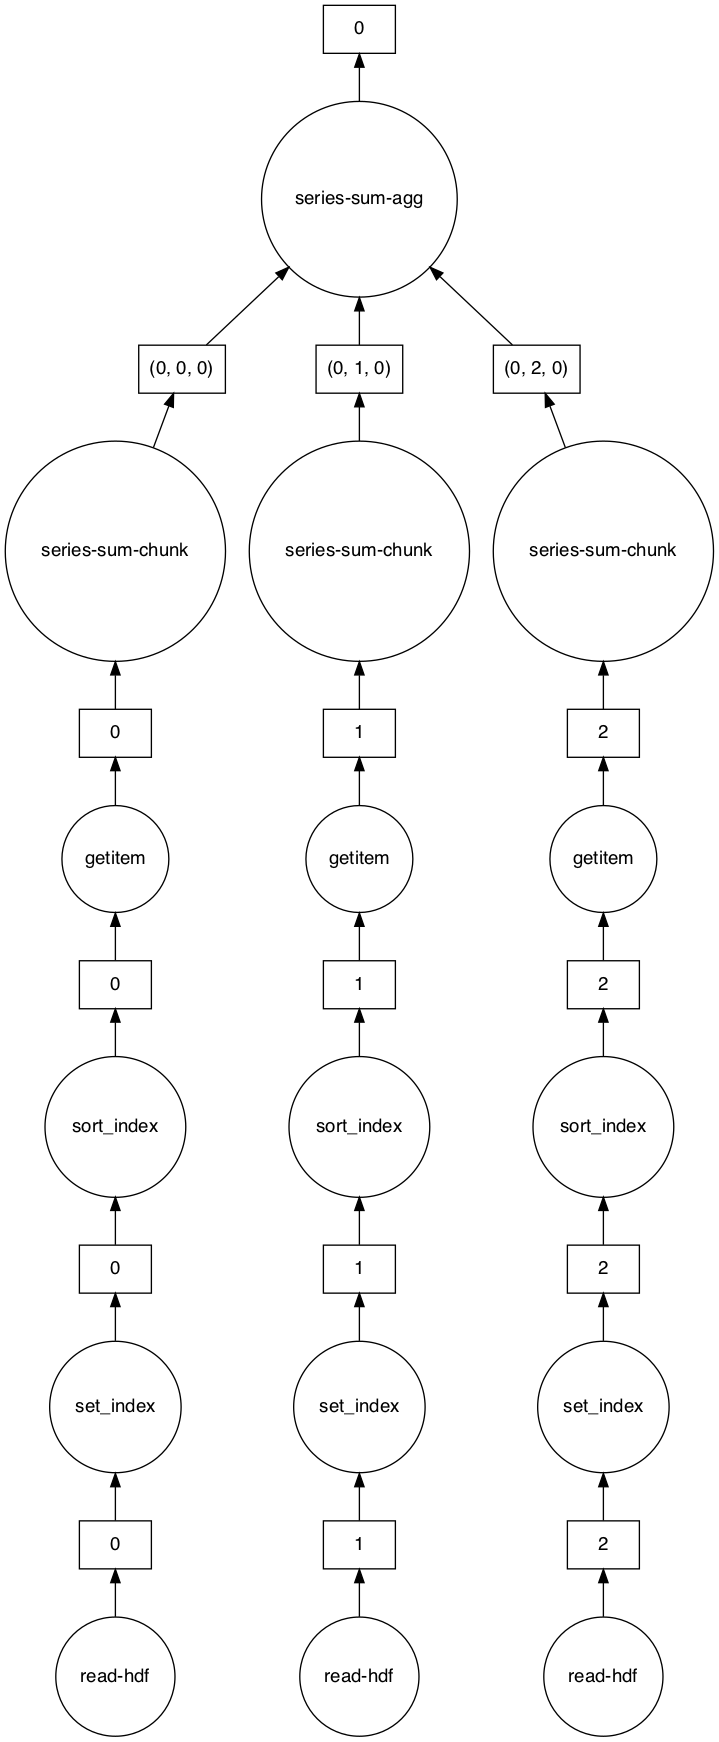

In [56]:
df['ra'].sum().visualize()